In [2]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
#подготовка данных

data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t' )
fix = data.loc[data['item_price']==1.99].copy()
data.drop(index = 4509, inplace = True)
fix.item_price = 2.15
data = pd.concat([data,fix],ignore_index=True, axis=0)

In [4]:
#1. Вывести: кол-во наблюдений в датасете

size = data.shape[0]
print(size)

4622


In [13]:
#2. Вывести названия столбцов

for col in data.columns:
    print(col)

order_id
quantity
item_name
choice_description
item_price


In [ ]:
#3. Определить самую частую позицию (item) в заказе

data['item_name'].value_counts().idxmax()

'Chicken Bowl'

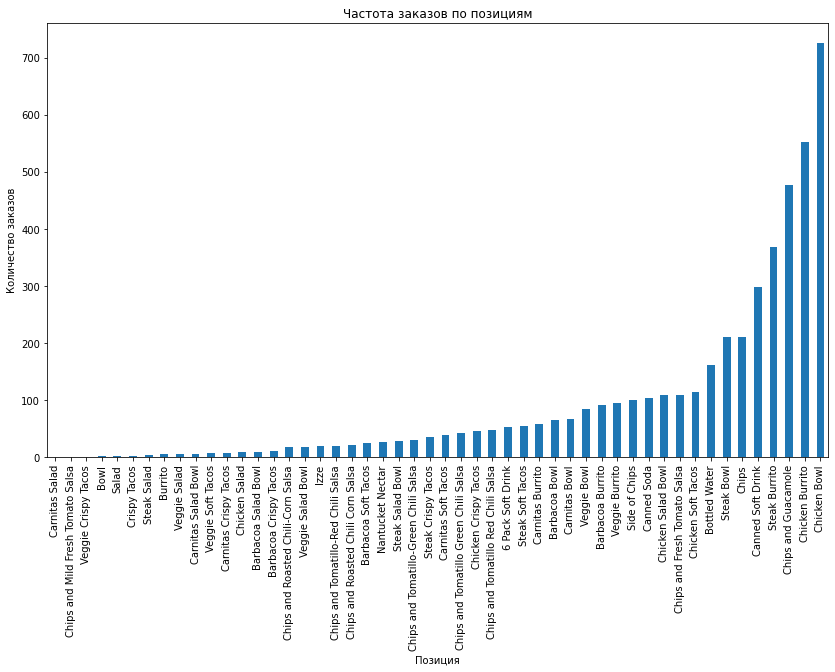

In [35]:
#4. Построить гистрограмму частоты заказов по позициям (item)

items = Counter(data.item_name)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)
srs.plot(kind='bar', figsize=(14, 8))
plt.title('Частота заказов по позициям')
plt.xlabel('Позиция')
plt.ylabel('Количество заказов')
plt.show()

In [31]:
#5. Измените тип переменной item_price с помощью лямбды функции

data['item_price'] = data.apply(lambda x: float(x['item_price'].replace('$', '')),axis=1)
data.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


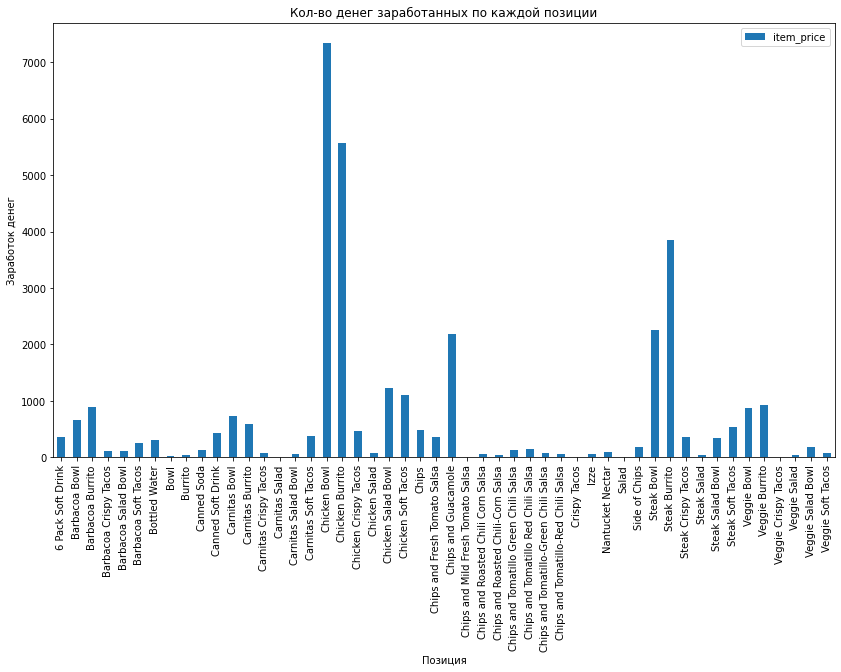

In [39]:
#6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

srs = data[['item_name', 'item_price']]
srs = srs.groupby('item_name').sum()
srs.plot(kind='bar', figsize=(14, 8))
plt.title('Кол-во денег заработанных по каждой позиции')
plt.xlabel('Позиция')
plt.ylabel('Заработок денег')
plt.show()

In [48]:
#7. Средняя сумма заказа? (минимум 2 способа)

# первый способ
print('Средняя сумма заказа первым способом')
print(data['item_price'].sum() / data['order_id'].max())
print()
# второй способ
print('Средняя сумма заказа вторым способом')
data.groupby('order_id')['item_price'].sum().mean()


Средняя сумма заказа первым способом
18.7810959651036

Средняя сумма заказа вторым способом


18.811867831786028

In [49]:
#8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

data.groupby('order_id').agg(['mean','min','max','median'])

quantity                item_price                      
             mean min max median       mean    min    max  median
order_id                                                         
1             1.0   1   1    1.0   2.890000   2.39   3.39   2.890
2             2.0   2   2    2.0  16.980000  16.98  16.98  16.980
3             1.0   1   1    1.0   6.335000   1.69  10.98   6.335
4             1.0   1   1    1.0  10.500000   9.25  11.75  10.500
5             1.0   1   1    1.0   6.850000   4.45   9.25   6.850
...           ...  ..  ..    ...        ...    ...    ...     ...
1830          1.0   1   1    1.0  11.500000  11.25  11.75  11.500
1831          1.0   1   1    1.0   4.300000   1.50   9.25   2.150
1832          1.0   1   1    1.0   6.600000   4.45   8.75   6.600
1833          1.0   1   1    1.0  11.750000  11.75  11.75  11.750
1834          1.0   1   1    1.0   9.583333   8.75  11.25   8.750

[1831 rows x 8 columns]

In [59]:
#9. Определить статистику заказов стейков, а также статистику заказов прожарки

steak = data.loc[data['item_name'].str.contains('Steak')]
steak.groupby('item_name')['quantity', 'item_price'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


quantity                      ... item_price              
                      count      mean       std  ...        50%    75%    max
item_name                                        ...                         
Steak Bowl            210.0  1.047619  0.234814  ...       9.25  11.75  26.07
Steak Burrito         368.0  1.048913  0.239889  ...       9.25  11.75  27.75
Steak Crispy Tacos     35.0  1.028571  0.169031  ...       9.25  11.75  17.98
Steak Salad             4.0  1.000000  0.000000  ...       8.99   8.99   8.99
Steak Salad Bowl       29.0  1.068966  0.257881  ...      11.89  11.89  23.78
Steak Soft Tacos       55.0  1.018182  0.134840  ...       9.25   9.25  18.50

[6 rows x 16 columns]

In [50]:
#10. Добавить новый столбец цен на каждую позицию в заказе в рублях

rate = 72.5
data['item_price_rub'] = round(data.item_price * rate, 2)
data.head(5)

,order_id,quantity,item_name,choice_description,item_price,item_price_rub
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,173.28
1,1,1,Izze,[Clementine],3.39,245.78
2,1,1,Nantucket Nectar,[Apple],3.39,245.78
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,173.28
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1231.05


In [58]:
#11. Сгруппировать заказы по входящим позициям в него. 

group_orders = data.groupby('order_id').agg({'item_name': lambda data: ", ".join(data), 'item_price':np.sum,'quantity':np.sum}).reset_index()
group_orders.head(5)

,order_id,item_name,item_price,quantity
0,1,"Chips and Fresh Tomato Salsa, Izze, Nantucket ...",11.56,4
1,2,Chicken Bowl,16.98,2
2,3,"Chicken Bowl, Side of Chips",12.67,2
3,4,"Steak Burrito, Steak Soft Tacos",21.00,2
4,5,"Steak Burrito, Chips and Guacamole",13.70,2


In [61]:
#Отдельно сгруппировать по стейкам во всех видах прожарках

group_steak = steak.groupby('order_id',).agg({'item_name': lambda data: ", ".join(data), 'item_price':np.sum, 'quantity':np.sum}).reset_index()
group_steak

,order_id,item_name,item_price,quantity
0,4,"Steak Burrito, Steak Soft Tacos",21.00,2
1,5,Steak Burrito,9.25,1
2,16,Steak Burrito,8.99,1
3,20,Steak Burrito,11.75,1
4,21,Steak Burrito,8.99,1
...,...,...,...,...
606,1810,Steak Crispy Tacos,11.75,1
607,1818,Steak Salad Bowl,9.39,1
608,1829,Steak Burrito,11.75,1
609,1830,Steak Burrito,11.75,1


In [ ]:
#12. Определить цену по каждой позиции в отдельности
